In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

#識別子の作成
from sklearn.base import BaseEstimator, TransformerMixin

In [13]:
housing = fetch_california_housing()

In [18]:
df_X = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [33]:
df_X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
# それぞれのcolumnの平均値を出す
df_X.mean(axis=0)

MedInc           3.870671
HouseAge        28.639486
AveRooms         5.429000
AveBedrms        1.096675
Population    1425.476744
AveOccup         3.070655
Latitude        35.631861
Longitude     -119.569704
dtype: float64

In [24]:
df_X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [25]:
# Class を作成
class SimpleConverter(BaseEstimator, TransformerMixin):    # BaseEstimator, TransformerMixin この二つを継承することで、sklearn にならったクラスを定義できる
    def __init__(self):
        self.x_mean = None

    # 平均値を求める
    def fit(self, X, y=None):    # 教師ありではyを使用する。今回は教師なしだがy=Noneにしておく
        self.x_mean = X.mean(axis=0)
        self.transformed = pd.DataFrame(np.zeros_like(X))    # df_X.shape によって表示される行・列の数分の空のデータフレームを作成している
        return self
    
    def transform(self, X):    # 学習用のためのデータや、変換したい値を引数にする
        self.transformed.columns = X.columns
        for col in X.columns:
            for row in range(X.shape[0]):
                self.transformed.loc[row, col] = X.loc[row, col] - self.x_mean[col]    # 平均をそれぞれの値のセルから引く
        return self.transformed

In [26]:
# Class をインスタンス化
mean_model = SimpleConverter()

In [28]:
# fit で、学習
mean_model.fit(df_X)

SimpleConverter()

In [31]:
# mean_model.x_mean    # 平均値が出力される
# transform で変換
x_mean = mean_model.transform(df_X)
# 平均を引いた値を取得する
print(x_mean)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.454529,12.360514,1.555127,-0.072866,-1103.476744,-0.515100,2.248139,-2.660296
1,4.430729,-7.639486,0.809137,-0.124795,975.523256,-0.960813,2.228139,-2.650296
2,3.386729,23.360514,2.859136,-0.023229,-929.476744,-0.268395,2.218139,-2.670296
3,1.772429,23.360514,0.388352,-0.023616,-867.476744,-0.522710,2.218139,-2.680296
4,-0.024471,23.360514,0.852854,-0.015594,-860.476744,-0.889188,2.218139,-2.680296
...,...,...,...,...,...,...,...,...
20635,-2.310371,-3.639486,-0.383545,0.036658,-580.476744,-0.510049,3.848139,-1.520296
20636,-1.313871,-10.639486,0.685035,0.219114,-1069.476744,0.052152,3.858139,-1.640296
20637,-2.170671,-11.639486,-0.223457,0.023417,-418.476744,-0.745020,3.798139,-1.650296
20638,-2.003471,-10.639486,-0.099487,0.075245,-684.476744,-0.947446,3.798139,-1.750296


In [34]:
mean_model.fit_transform(df_X)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.454529,12.360514,1.555127,-0.072866,-1103.476744,-0.515100,2.248139,-2.660296
1,4.430729,-7.639486,0.809137,-0.124795,975.523256,-0.960813,2.228139,-2.650296
2,3.386729,23.360514,2.859136,-0.023229,-929.476744,-0.268395,2.218139,-2.670296
3,1.772429,23.360514,0.388352,-0.023616,-867.476744,-0.522710,2.218139,-2.680296
4,-0.024471,23.360514,0.852854,-0.015594,-860.476744,-0.889188,2.218139,-2.680296
...,...,...,...,...,...,...,...,...
20635,-2.310371,-3.639486,-0.383545,0.036658,-580.476744,-0.510049,3.848139,-1.520296
20636,-1.313871,-10.639486,0.685035,0.219114,-1069.476744,0.052152,3.858139,-1.640296
20637,-2.170671,-11.639486,-0.223457,0.023417,-418.476744,-0.745020,3.798139,-1.650296
20638,-2.003471,-10.639486,-0.099487,0.075245,-684.476744,-0.947446,3.798139,-1.750296


# Adstockの変換Class

## 定式: $ y_t = x_t + \alpha*y_{t-1}$
## $\alpha$は繰り延べ効果をコントロールするハイパーパラメータ

In [37]:
def adstock_geometric(x:float, alpha:float):
    x_decay = np.zeros_like(x)
    x_decay[0] = x[0]    # 最初は一つ前の値がないのでそのまま代入

    for i in range(1, len(x_decay)):
        x_decay[i] = x[i] + alpha * x_decay[i-1]

    return x_decay

In [41]:
x = np.array([1.0, 0, 0, 0, 0])
adstock_geometric(x, 0.5)

array([1.    , 0.5   , 0.25  , 0.125 , 0.0625])

<BarContainer object of 5 artists>

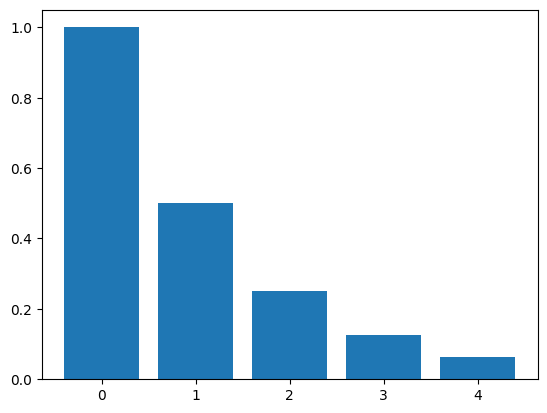

In [44]:
plt.bar(range(len(x)), adstock_geometric(x, 0.5))

In [46]:
x = np.array([1.0, 1.0, 0, 0, 0])
adstock_geometric(x, 0.5)

array([1.    , 1.5   , 0.75  , 0.375 , 0.1875])

<BarContainer object of 5 artists>

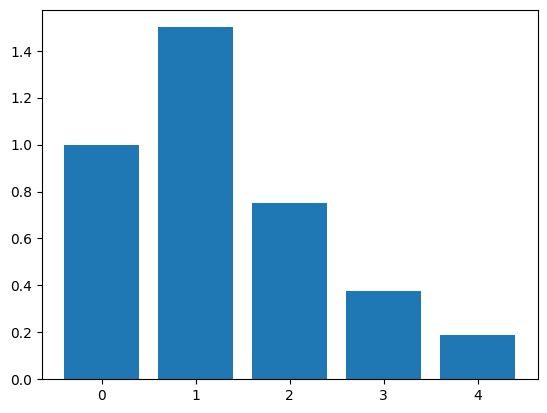

In [47]:
plt.bar(range(len(x)), adstock_geometric(x, 0.5))

In [48]:
x = np.array([1.0, 0, 0, 0, 0])
adstock_geometric(x, 0.4)

array([1.    , 0.4   , 0.16  , 0.064 , 0.0256])

<BarContainer object of 5 artists>

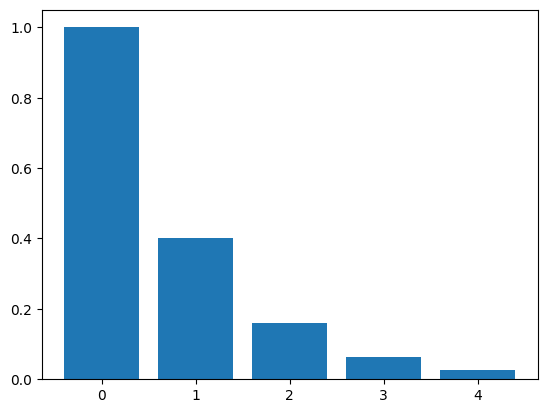

In [50]:
plt.bar(range(len(x)), adstock_geometric(x, 0.4))

In [51]:
class AdstockGeometric(BaseEstimator, TransformerMixin):
    def __init__(self, alpha = 0.5):
        self.alpha = alpha
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        x_decay = np.zeros_like(X)
        x_decay[0] = X[0]    # 最初は一つ前の値がないのでそのまま代入

        for i in range(1, len(x_decay)):
            x_decay[i] = X[i] + self.alpha * x_decay[i-1]

        return x_decay

In [53]:
AdstockGeometric(0.4).fit_transform(x)  

array([1.    , 0.4   , 0.16  , 0.064 , 0.0256])

In [54]:
mmm_data = pd.read_csv("data_raw_Robyn.csv")

In [56]:
mmm_data.head()

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,167687.6,0,95463.666667,7.290385e+07,0.000000,0,8125009,228213.987444,na,19401.653846
1,2015-11-30,2.584277e+06,214600.9,0,0.000000,1.658110e+07,29511.715457,31000,7901549,34258.573511,na,14791.000000
2,2015-12-07,2.547387e+06,0.0,248022,3404.000000,4.995477e+07,36132.358958,28400,8300197,127691.261335,na,14544.000000
3,2015-12-14,2.875220e+06,625877.3,0,132600.000000,3.164930e+07,36804.210958,31900,8122883,84014.720306,na,2800.000000
4,2015-12-21,2.215953e+06,0.0,520005,0.000000,8.802269e+06,28401.744069,27100,7105985,20687.478156,na,15478.000000


In [57]:
mmm_data.shape

(208, 12)

In [61]:
spend_cols = ['tv_S', 'ooh_S', 'print_S', 'search_S', 'facebook_S']

for col in spend_cols:
    print('-----')
    print(col)

    print(AdstockGeometric(alpha=0.5).fit_transform(mmm_data[col]))

-----
tv_S
[1.67687600e+05 2.98444700e+05 1.49222350e+05 7.00488475e+05
 3.50244238e+05 4.24311919e+05 2.17308859e+05 1.30796130e+05
 6.53980648e+04 3.26990324e+04 1.40188216e+05 7.00941081e+04
 5.32120354e+05 2.66060177e+05 4.44702289e+05 2.22351144e+05
 2.59468872e+05 1.29734436e+05 6.48672180e+04 3.24336090e+04
 1.62168045e+04 9.15589023e+04 4.57794511e+04 2.28897256e+04
 1.14448628e+04 5.72243139e+03 2.86121570e+03 1.43060785e+03
 7.15303924e+02 3.57651962e+02 1.53721726e+05 7.68608630e+04
 1.14338031e+05 5.71690157e+04 4.28376079e+04 2.14188039e+04
 2.22061302e+05 1.11030651e+05 2.70245425e+05 1.35122713e+05
 2.47495056e+05 2.83211328e+05 1.41605664e+05 7.08028320e+04
 3.54014160e+04 1.10172551e+06 5.50862754e+05 8.85851477e+05
 4.42925739e+05 9.26423769e+05 4.63211885e+05 6.24038842e+05
 3.64197321e+05 1.82098661e+05 1.97957330e+05 9.89786651e+04
 4.94893326e+04 8.32652266e+05 7.24233733e+05 3.62116867e+05
 2.25408133e+05 1.12704067e+05 3.58189233e+05 1.79094617e+05
 8.95473083e+

In [64]:
def geoDecay(alpha, L):
    '''
    累積のAdstock割合(geometric decay)
    weight_T = alpha ^ T-1  
    '''
    return alpha**(np.ones(L).cumsum()-1)

def delayed_adstock(alpha, theta, L):
    '''
     累積のAdstock割合(dealyed adstock function)
    
    weight_T = thetaで引いたもので２乗 
    '''
    return alpha**((np.ones(L).cumsum()-1)-theta)**2

def carryover(x, alpha, L, theta = None, func='geo'):
    
    transformed_x = []
    if func=='geo':
        weights = geoDecay(alpha, L)
        plt.plot(weights)
        
    elif func=='delayed':
        print("delayed")
        weights = delayed_adstock(alpha, theta, L)
        plt.plot(weights)
    
    for t in range(x.shape[0]):
        upper_window = t+1
        lower_window = max(0,upper_window-L)
        current_window_x = x[:upper_window]
        t_in_window = len(current_window_x)
        if t < L:
            new_x = (current_window_x*np.flip(weights[:t_in_window], axis=0)).sum()
            print("new_x", new_x)
            transformed_x.append(new_x/weights[:t_in_window].sum())
            print("transform_x", transformed_x)
            print("weights", weights[:t_in_window].sum())
        elif t >= L:
            current_window_x = x[upper_window-L:upper_window]
            print("current_window", current_window_x)
            ext_weights = np.flip(weights, axis=0) 
            new_x = (current_window_x*ext_weights).sum()
            transformed_x.append(new_x/ext_weights.sum())
    return np.array(transformed_x)

In [62]:
x = np.array([2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
print(len(x))
print(x)

12
[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


new_x 2.0
transform_x [np.float64(2.0)]
weights 1.0
new_x 1.0
transform_x [np.float64(2.0), np.float64(0.6666666666666666)]
weights 1.5
new_x 0.5
transform_x [np.float64(2.0), np.float64(0.6666666666666666), np.float64(0.2857142857142857)]
weights 1.75
new_x 0.25
transform_x [np.float64(2.0), np.float64(0.6666666666666666), np.float64(0.2857142857142857), np.float64(0.13333333333333333)]
weights 1.875
new_x 0.125
transform_x [np.float64(2.0), np.float64(0.6666666666666666), np.float64(0.2857142857142857), np.float64(0.13333333333333333), np.float64(0.06451612903225806)]
weights 1.9375
new_x 0.0625
transform_x [np.float64(2.0), np.float64(0.6666666666666666), np.float64(0.2857142857142857), np.float64(0.13333333333333333), np.float64(0.06451612903225806), np.float64(0.031746031746031744)]
weights 1.96875
new_x 0.03125
transform_x [np.float64(2.0), np.float64(0.6666666666666666), np.float64(0.2857142857142857), np.float64(0.13333333333333333), np.float64(0.06451612903225806), np.float64(

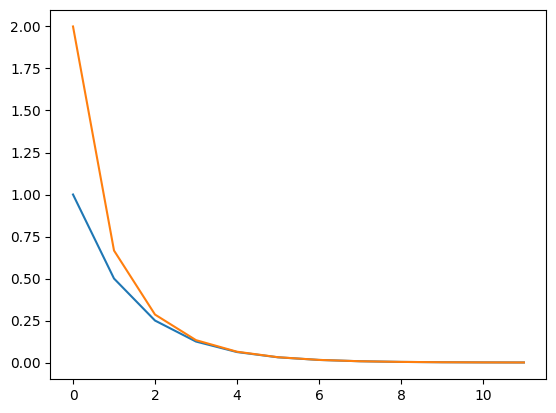

In [65]:
plt.plot(carryover(x, alpha=0.5, L=len(x)))

delayed
new_x 0.00390625
transform_x [np.float64(2.0)]
weights 0.001953125
new_x 0.125
transform_x [np.float64(2.0), np.float64(1.9393939393939394)]
weights 0.064453125
new_x 1.0
transform_x [np.float64(2.0), np.float64(1.9393939393939394), np.float64(1.7716262975778547)]
weights 0.564453125
new_x 2.0
transform_x [np.float64(2.0), np.float64(1.9393939393939394), np.float64(1.7716262975778547), np.float64(1.2784019975031211)]
weights 1.564453125
new_x 1.0
transform_x [np.float64(2.0), np.float64(1.9393939393939394), np.float64(1.7716262975778547), np.float64(1.2784019975031211), np.float64(0.48438978240302744)]
weights 2.064453125
new_x 0.125
transform_x [np.float64(2.0), np.float64(1.9393939393939394), np.float64(1.7716262975778547), np.float64(1.2784019975031211), np.float64(0.48438978240302744), np.float64(0.05876951331496786)]
weights 2.126953125
new_x 0.00390625
transform_x [np.float64(2.0), np.float64(1.9393939393939394), np.float64(1.7716262975778547), np.float64(1.27840199750312

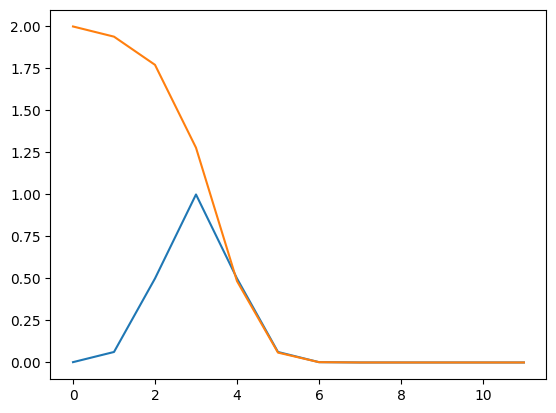

In [70]:
plt.plot(carryover(x, alpha=0.5, L=len(x), theta=3, func="delayed"))